In [36]:
import numpy
import pandas
import pandas as pd
import csv
import os

In [37]:
tr_path = 'hw1/2023-ntust-practice-of-social-media-analyticshw1/new_train_data.csv'  # path to training data
train_df = pd.read_csv('hw1/2023-ntust-practice-of-social-media-analyticshw1/new_train_data.csv')

tt_path = 'hw1/2023-ntust-practice-of-social-media-analyticshw1/new_test_data.csv'   # path to testing data
test_df = pd.read_csv('hw1/2023-ntust-practice-of-social-media-analyticshw1/new_test_data.csv')

In [38]:
!nvidia-smi

Sat May 13 19:26:13 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 517.20       Driver Version: 517.20       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   54C    P8     8W /  N/A |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [39]:
train_df

,node1,node2,label
0,9112,38149,0
1,38751,38824,1
2,23013,7184,0
3,38000,38145,1
4,37109,8452,0
...,...,...,...
23995,28115,28124,1
23996,38135,38141,1
23997,3970,38226,0
23998,11727,38264,0


In [40]:
test_df

,node_pair_id,node1,node2
0,0,40963,40966
1,1,4544,49357
2,2,38726,38760
3,3,4636,38678
4,4,26789,5842
...,...,...,...
5995,5995,28930,16004
5996,5996,10247,22013
5997,5997,22854,26234
5998,5998,38127,38215


In [41]:
x = train_df.drop(['label'], axis = 1)
x

,node1,node2
0,9112,38149
1,38751,38824
2,23013,7184
3,38000,38145
4,37109,8452
...,...,...
23995,28115,28124
23996,38135,38141
23997,3970,38226
23998,11727,38264


In [42]:
#split train dev dataset
from sklearn.model_selection import train_test_split
y = train_df['label']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state = 0)
#X_train, X_dev, y_train, y_dev = train_test_split(X, y,test_size=0.2,random_state=0)

In [43]:
x_test = test_df.drop(['node_pair_id'], axis = 1)
x_test

,node1,node2
0,40963,40966
1,4544,49357
2,38726,38760
3,4636,38678
4,26789,5842
...,...,...
5995,28930,16004
5996,10247,22013
5997,22854,26234
5998,38127,38215


## SVM

In [ ]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
#載入classification report & confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

In [ ]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(train_df.drop(['label'], axis = 1),train_df['label'])

In [ ]:
x_test = test_df.drop(['node_pair_id'], axis = 1)
x_test

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions

In [ ]:
len(predictions)

In [ ]:
predict_df = pd.DataFrame(predictions, columns= ['ans'])
predict_df

In [ ]:
submission_path = 'hw1/2023-ntust-practice-of-social-media-analyticshw1/sample_submit.csv'   
submission_df = pd.read_csv('hw1/2023-ntust-practice-of-social-media-analyticshw1/sample_submit.csv')
submission_df

In [ ]:
submission = pd.DataFrame({ 'node_pair_id': submission_df.node_pair_id.values, 'ans': predict_df.ans.values })
submission.to_csv("submission_svm.csv", index=False)

#### result:0.75583

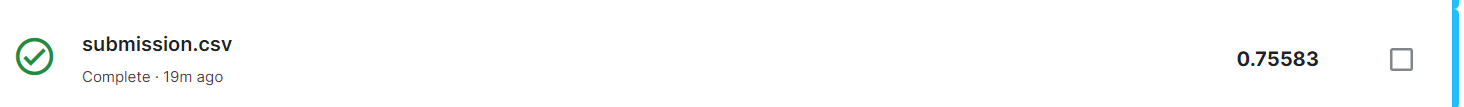

## random forest

In [44]:
from sklearn import ensemble, preprocessing, metrics
forest = ensemble.RandomForestClassifier(n_estimators = 180)
forest_fit = forest.fit(train_df.drop(['label'], axis = 1),train_df['label'])

In [46]:
predictions_forest = forest_fit.predict(x_test)

In [47]:
len(predictions_forest)

6000

In [48]:
predictions_forest = predictions_forest.tolist()

In [49]:
submission_path = 'hw1/2023-ntust-practice-of-social-media-analyticshw1/sample_submit.csv'   
submission_df = pd.read_csv('hw1/2023-ntust-practice-of-social-media-analyticshw1/sample_submit.csv')
submission_df

,node_pair_id,ans
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
...,...,...
5995,5995,NaN
5996,5996,NaN
5997,5997,NaN
5998,5998,NaN


In [50]:
submission_forest = pd.DataFrame({ 'node_pair_id': submission_df.node_pair_id.values, 'ans': predictions_forest })
submission_forest.to_csv("submission_forest.csv", index=False)

#### 0.85888

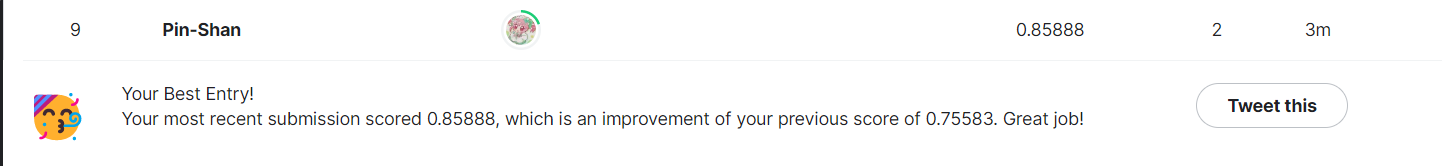

## xgboost

In [51]:
from xgboost import XGBClassifier

# 建立 XGBClassifier 模型
xgboostModel = XGBClassifier(n_estimators=180, learning_rate= 0.03)
# 使用訓練資料訓練模型
xgboostModel.fit(train_df.drop(['label'], axis = 1),train_df['label'])
# 使用訓練資料預測分類
predictions_xgboost = xgboostModel.predict(x_test)

In [52]:
len(predictions_xgboost)

6000

In [53]:
predictions_xgboost = predictions_xgboost.tolist()

In [54]:
submission_xgboost = pd.DataFrame({ 'node_pair_id': submission_df.node_pair_id.values, 'ans': predictions_xgboost })
submission_xgboost.to_csv("submission_xgboost.csv", index=False)

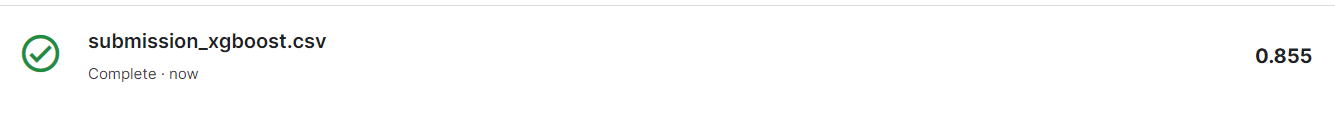